In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scanpy as sc
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.pyplot import rc_context
import os
import seaborn as sns
import importlib
import re

In [2]:
import degSummary
from scanpyColor import godsnot_102

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150, facecolor='white', dpi_save=600)

scanpy==1.8.2 anndata==0.7.5 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.10.3 louvain==0.8.0 pynndescent==0.5.8


In [53]:
sns.set_theme(style="ticks")

# Load data

In [4]:
os.chdir('../..')

In [5]:
pwd

'/data/tcl/Project/ADFCA'

In [6]:
age_L=['10', '20', '30']
ageColor_L=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']
ageColor_L2=['#009ACD', '#FF7D40', '#2CA02C', '#D62728']
ggplotColor3_L= ["#F8766D", "#00BA38", "#619CFF"]
set2Color_L=["#66C2A5", "#E9936A", "#A89BB0"]

In [7]:
genotype_L=['control', 'AB42', 'hTau']

In [8]:
figureFolder = 'Analysis/Figure'
os.makedirs(figureFolder, exist_ok=True)

In [9]:
figureDataFolder=f'Analysis/Figure'
os.makedirs(figureDataFolder, exist_ok=True)
figure1Folder=f'{figureDataFolder}/Figure1'
os.makedirs(figure1Folder, exist_ok=True)
figure2Folder=f'{figureDataFolder}/Figure2'
os.makedirs(figure2Folder, exist_ok=True)
figure2PicFolder=f'{figure2Folder}/pic'
os.makedirs(figure2PicFolder, exist_ok=True)

In [10]:
figure3Folder=f'{figureDataFolder}/Figure3'
os.makedirs(figure3Folder, exist_ok=True)
figure3PicFolder=f'{figure3Folder}/pic'
os.makedirs(figure3PicFolder, exist_ok=True)

In [11]:
figure4Folder=f'{figureDataFolder}/Figure4'
os.makedirs(figure4Folder, exist_ok=True)
figure4PicFolder=f'{figure4Folder}/pic'
os.makedirs(figure4PicFolder, exist_ok=True)

In [12]:
cellnFolder=f'{figure4Folder}/cellN'
os.makedirs(cellnFolder, exist_ok=True)

compositionFolder=f'{figure4Folder}/composition'
os.makedirs(compositionFolder, exist_ok=True)

In [13]:
degControlFolder=f'{figure4Folder}/DEG_toControl'
os.makedirs(degControlFolder, exist_ok=True)

degGenoAgeFolder=f'{figure4Folder}/DEG_genoAge'
os.makedirs(degGenoAgeFolder, exist_ok=True)

degCelltypeFolder=f'{figure4Folder}/DEG_celltype'
os.makedirs(degCelltypeFolder, exist_ok=True)
degSummaryFolder=f'{figure4Folder}/degSummary'
os.makedirs(degSummaryFolder, exist_ok=True)

In [14]:
### Fig4 GO: non-neuronal cells

goFolder=f'{figure4Folder}/GO_compareToControl'
os.makedirs(goFolder, exist_ok=True)

goIdFolder=f'{goFolder}/geneID'
os.makedirs(goIdFolder, exist_ok=True)
goNameFolder=f'{goFolder}/geneName'
os.makedirs(goNameFolder, exist_ok=True)

revigoFolder=f'{figure4Folder}/revigo_compareToControl'
os.makedirs(revigoFolder, exist_ok=True)

In [15]:
genoAge_L = ['control_10', 'control_20', 'control_30', 'AB42_10', 'AB42_20', 'hTau_20', 'hTau_30']

In [16]:
# genoAgeSex_L = ['control_10_female', 'control_10_male', 'control_20_female', 'control_20_male', 'control_30_female', 'control_30_male', 
#                 'AB42_10_female', 'AB42_10_male', 'AB42_20_female', 'AB42_20_male', 
#                 'hTau_20_female', 'hTau_20_male', 'hTau_30_female', 'hTau_30_male']

In [17]:
genoAgeSex_L = ['control_10_female', 'control_20_female', 'control_30_female', 'control_10_male', 'control_20_male', 'control_30_male', 
                'AB42_10_female', 'AB42_20_female', 'AB42_10_male', 'AB42_20_male', 
                'hTau_20_female', 'hTau_30_female', 'hTau_20_male', 'hTau_30_male']

In [18]:
# ageCompare
genoCompare_Df = pd.DataFrame(columns=['expSet', 'controlSet', 'age'])
# genoCompare_Df['expSet'] = [exp for exp in genoAge_L if 'control' not in exp]
# genoCompare_Df['controlSet'] = pd.Categorical(['control_' + '_'.join(genoAge.split('_')[1:]) for genoAge in genoCompare_Df['expSet']])


genoCompare_Df.loc[0,:] = ['AB42', 'control_inAB42', '10,20']
genoCompare_Df.loc[1,:] = ['hTau', 'control_inTau', '20,30']
genoCompare_Df

expSet      controlSet    age
0   AB42  control_inAB42  10,20
1   hTau   control_inTau  20,30

In [19]:
celltypeN700_L = pd.read_csv(f'{figure2Folder}/cellN/celltype_cellN_n700.csv').annotation.to_list()
celltypeN_Df=pd.read_csv(f'{figure2Folder}/cellN/celltype_cellN.csv')
celltypeN700_Df=pd.read_csv(f'{figure2Folder}/cellN/celltype_cellN_n700.csv')
len(celltypeN700_L)

102

In [20]:
adfcaTissue = 'body'

# Load adata

In [21]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_head_v0.6_woHarmony_raw.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_body_v0.6_woHarmony_raw.h5ad')

In [22]:
adata_headBody = adata_head.concatenate(adata_body, join='outer')
adata_headBody

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 624458 × 16219
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_genes', 'dataset', 'cellBC', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'genoAge', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'leiden_1.0', 'leiden_1.5', 'leiden_2.0', 'leiden_3.0', 'leiden_4.0', 'leiden_5.0', 'leiden_6.0', 'leiden_7.0', 'leiden_8.0', 'leiden_9.0', 'leiden_10.0', 'adfca_annotation_group', 'adfca_annotation_subcluster'
    var: 'gene_ids', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'

# Over-representation analyzed by Enrichr using KEGG pathway

## Load fat body DEGs

In [23]:
degDf = pd.read_csv(f'{figure2Folder}/DEG_genotype_toControl/adult fat body_body_hTau_control_inTau.csv')
# degDf = degDf[degDf.hTau_pvals_adj < 0.05].dropna()
degDf = degDf.rename(columns = {'hTau_names': 'Gene'})
degDf

Gene     hTau_pvals  hTau_pvals_adj  hTau_logfoldchanges
0        glob1   0.000000e+00    0.000000e+00             2.226983
1        CadN2   0.000000e+00    0.000000e+00             5.864644
2          Lk6  5.820863e-284   1.048984e-280             0.804302
3        Act5C  1.427417e-160   4.823184e-158             2.079932
4       CG2233  6.794203e-160   2.248881e-157             0.650432
...        ...            ...             ...                  ...
16214   AdipoR  1.908239e-308   4.421389e-305            -1.693644
16215   AcCoAS   0.000000e+00    0.000000e+00            -2.026020
16216  CG10082   0.000000e+00    0.000000e+00            -1.861764
16217    Lsd-2   0.000000e+00    0.000000e+00            -1.820978
16218    Gpdh1   0.000000e+00    0.000000e+00            -2.714570

[16219 rows x 4 columns]

In [24]:
degDf['Rank'] = -np.log10(degDf.hTau_pvals_adj)*degDf.hTau_logfoldchanges

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
degDf.sort_values(by='Rank', inplace=True, ascending=False)#.reset_index(drop=True)
degDf.reset_index(drop=True, inplace=True)
degDf

Gene     hTau_pvals  hTau_pvals_adj  hTau_logfoldchanges        Rank
0        glob1   0.000000e+00    0.000000e+00             2.226983         inf
1        CadN2   0.000000e+00    0.000000e+00             5.864644         inf
2        Act5C  1.427417e-160   4.823184e-158             2.079932  327.208047
3        NK7.1  8.970981e-146   2.552638e-143             2.200786  313.816688
4        SPH93   1.723417e-84    2.010943e-82             3.747512  306.159015
...        ...            ...             ...                  ...         ...
16214  CG42540  1.936054e-106   3.340518e-104            -5.448289 -563.768209
16215   AcCoAS   0.000000e+00    0.000000e+00            -2.026020        -inf
16216  CG10082   0.000000e+00    0.000000e+00            -1.861764        -inf
16217    Lsd-2   0.000000e+00    0.000000e+00            -1.820978        -inf
16218    Gpdh1   0.000000e+00    0.000000e+00            -2.714570        -inf

[16219 rows x 5 columns]

In [26]:
degs_sig = degDf[degDf.hTau_pvals_adj < 0.05]
degs_up = degs_sig[degs_sig.hTau_logfoldchanges > 0]
degs_dw = degs_sig[degs_sig.hTau_logfoldchanges < 0]

In [27]:
degs_up

Gene     hTau_pvals  hTau_pvals_adj  hTau_logfoldchanges        Rank
0      glob1   0.000000e+00    0.000000e+00             2.226983         inf
1      CadN2   0.000000e+00    0.000000e+00             5.864644         inf
2      Act5C  1.427417e-160   4.823184e-158             2.079932  327.208047
3      NK7.1  8.970981e-146   2.552638e-143             2.200786  313.816688
4      SPH93   1.723417e-84    2.010943e-82             3.747512  306.159015
..       ...            ...             ...                  ...         ...
623  aralar1   5.525851e-04    4.517327e-03             0.118873    0.278770
669  Tomosyn   6.638506e-03    4.506904e-02             0.125517    0.168962
733      kra   2.546212e-03    1.879700e-02             0.032708    0.056451
740      lqf   2.661205e-05    2.541936e-04             0.013534    0.048652
763  CG17124   6.657824e-07    7.375905e-06             0.006204    0.031840

[463 rows x 5 columns]

## Over-representation analysis (Enrichr API

In [28]:
import gseapy as gp

In [29]:
keggFolder = '/data/tcl/Resource/KEGG/Fly'

In [30]:
# read gmt file into dict
kegg = gp.read_gmt(f'{keggFolder}/kegg_fly_pathway_FlyBase631Name.gmt')

In [31]:
# Enricr API
enr_up = gp.enrichr(degs_up.Gene,
                    gene_sets=kegg,
                    outdir=None)

In [32]:
# trim (go:...)
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]

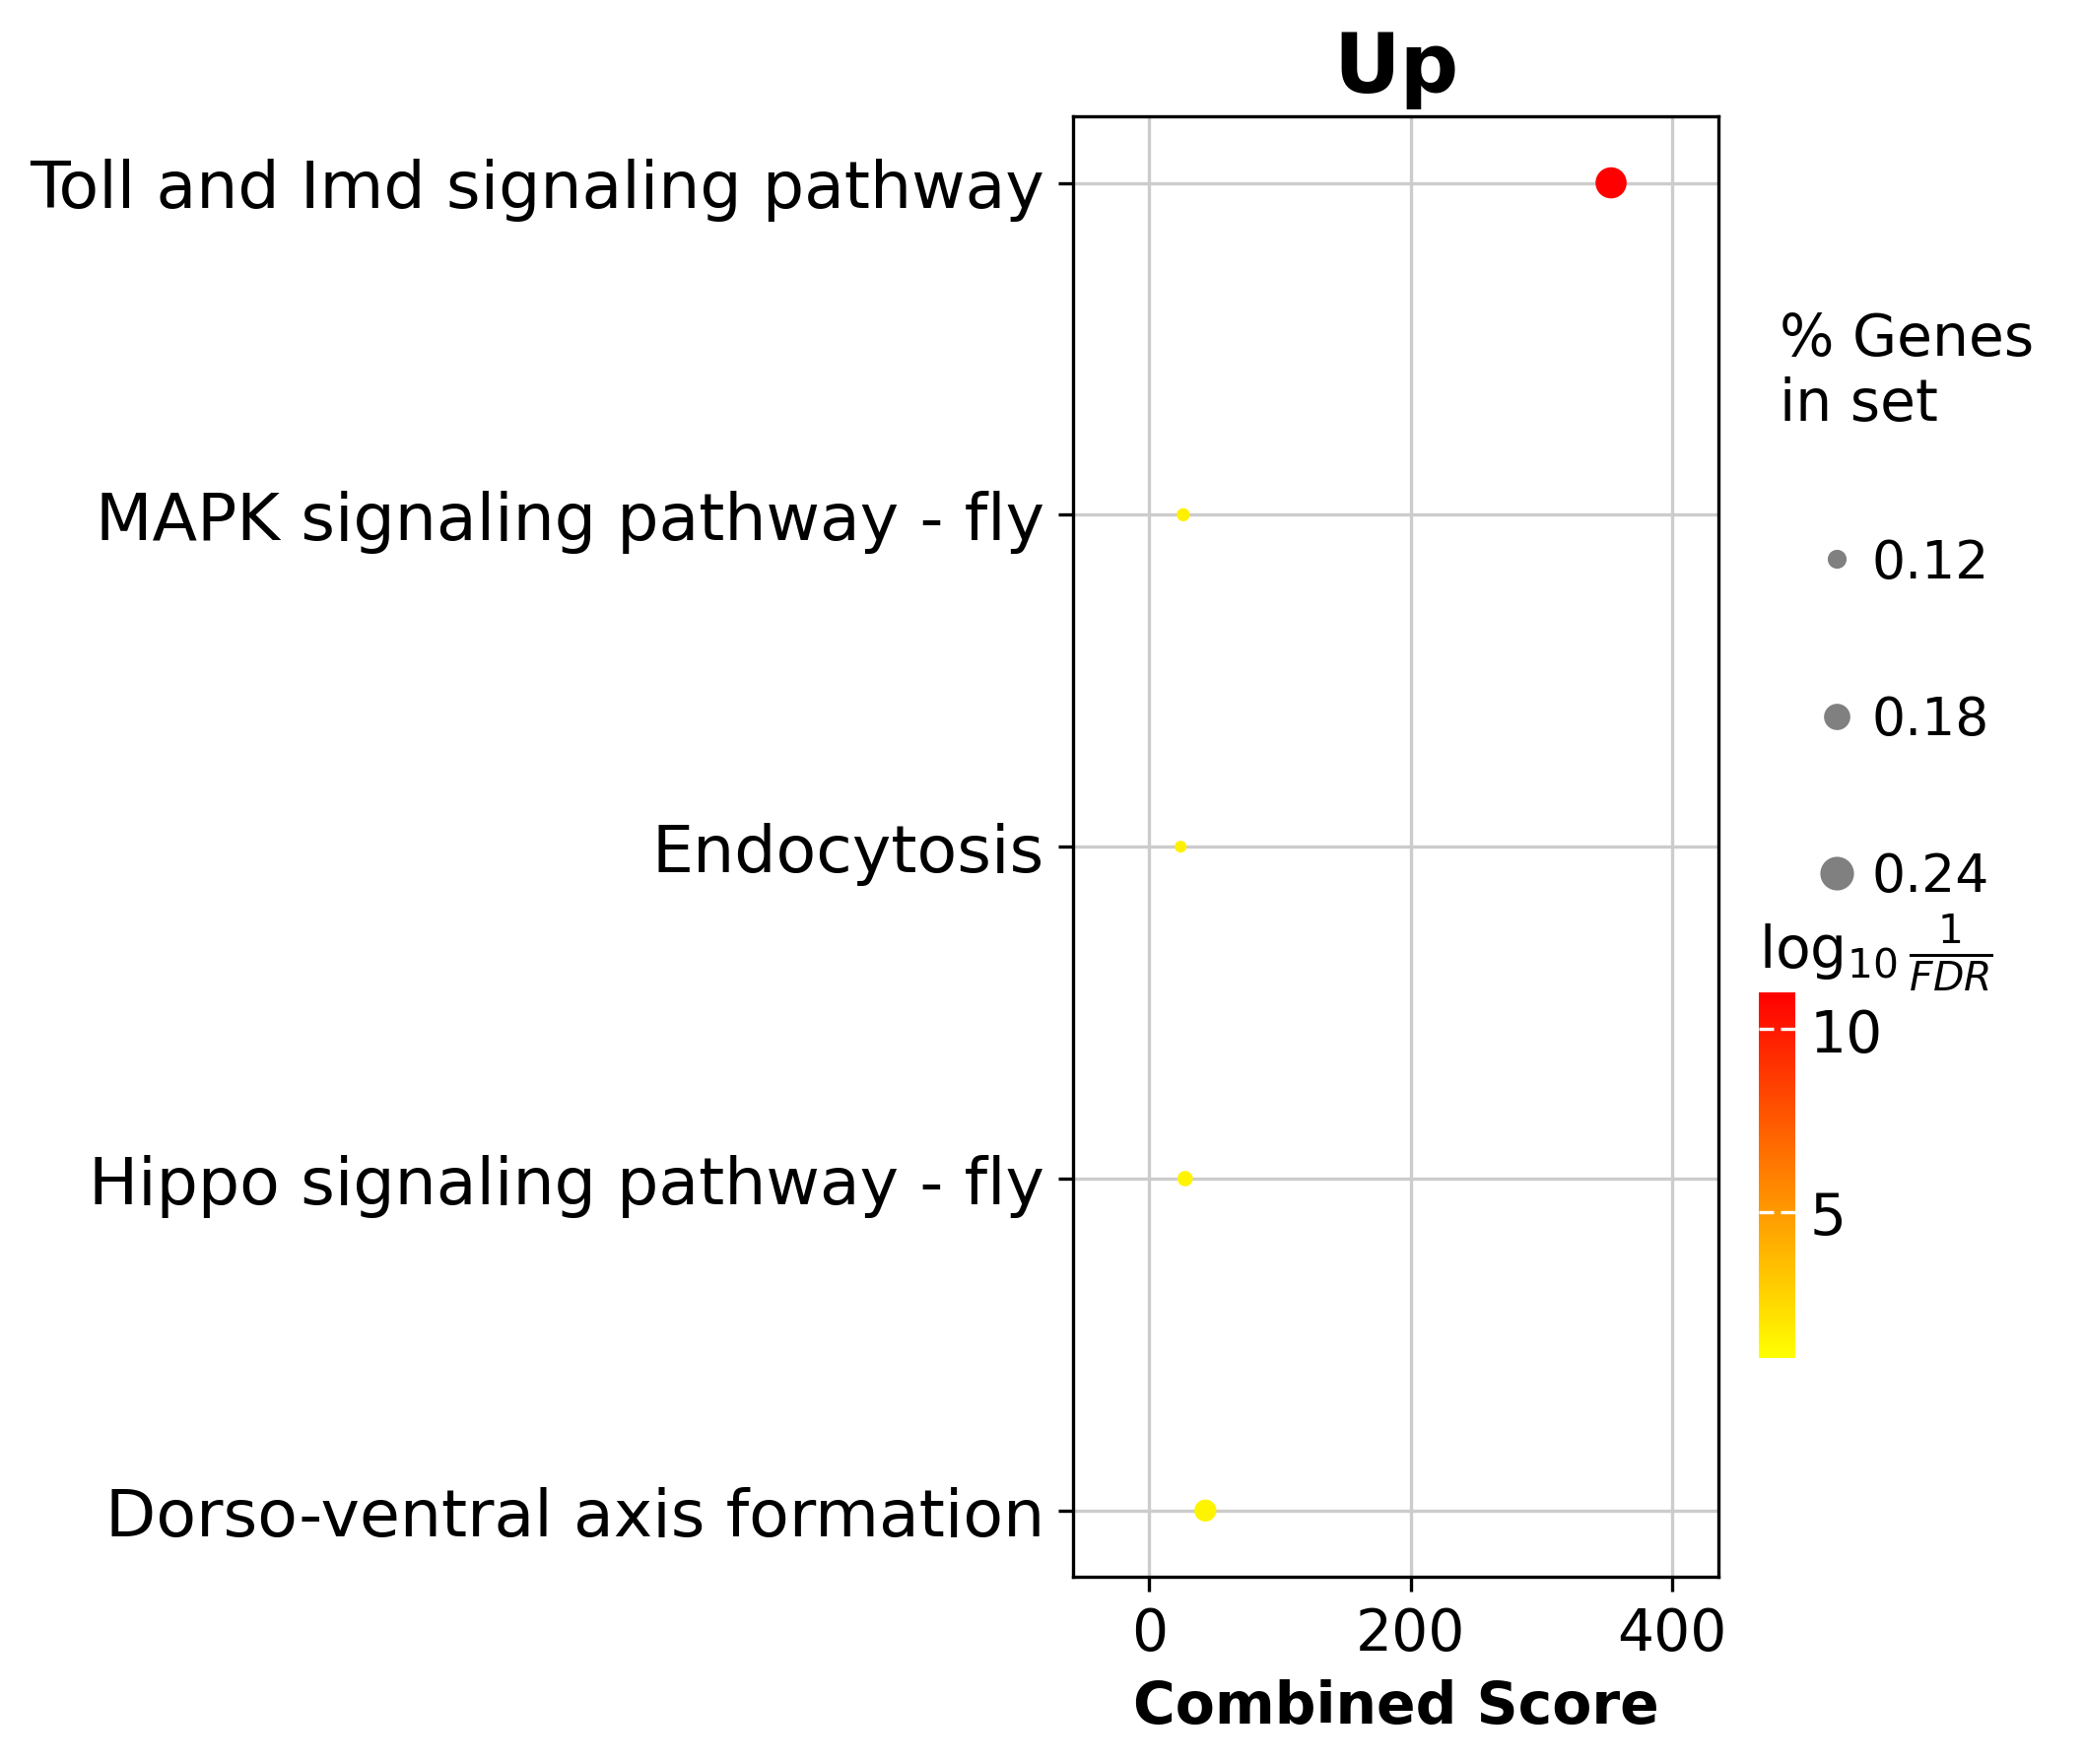

In [38]:
# dotplot
gp.dotplot(enr_up.res2d, figsize=(3.5, 6.5), title="Up", cmap = plt.cm.autumn_r)
plt.savefig(f'{figure4PicFolder}/KEGG_pathway_enrichr_fatBody_up.pdf', bbox_inches='tight')
plt.show()

In [33]:
enr_dw = gp.enrichr(degs_dw.Gene,
                    gene_sets=kegg,
                    outdir=None)

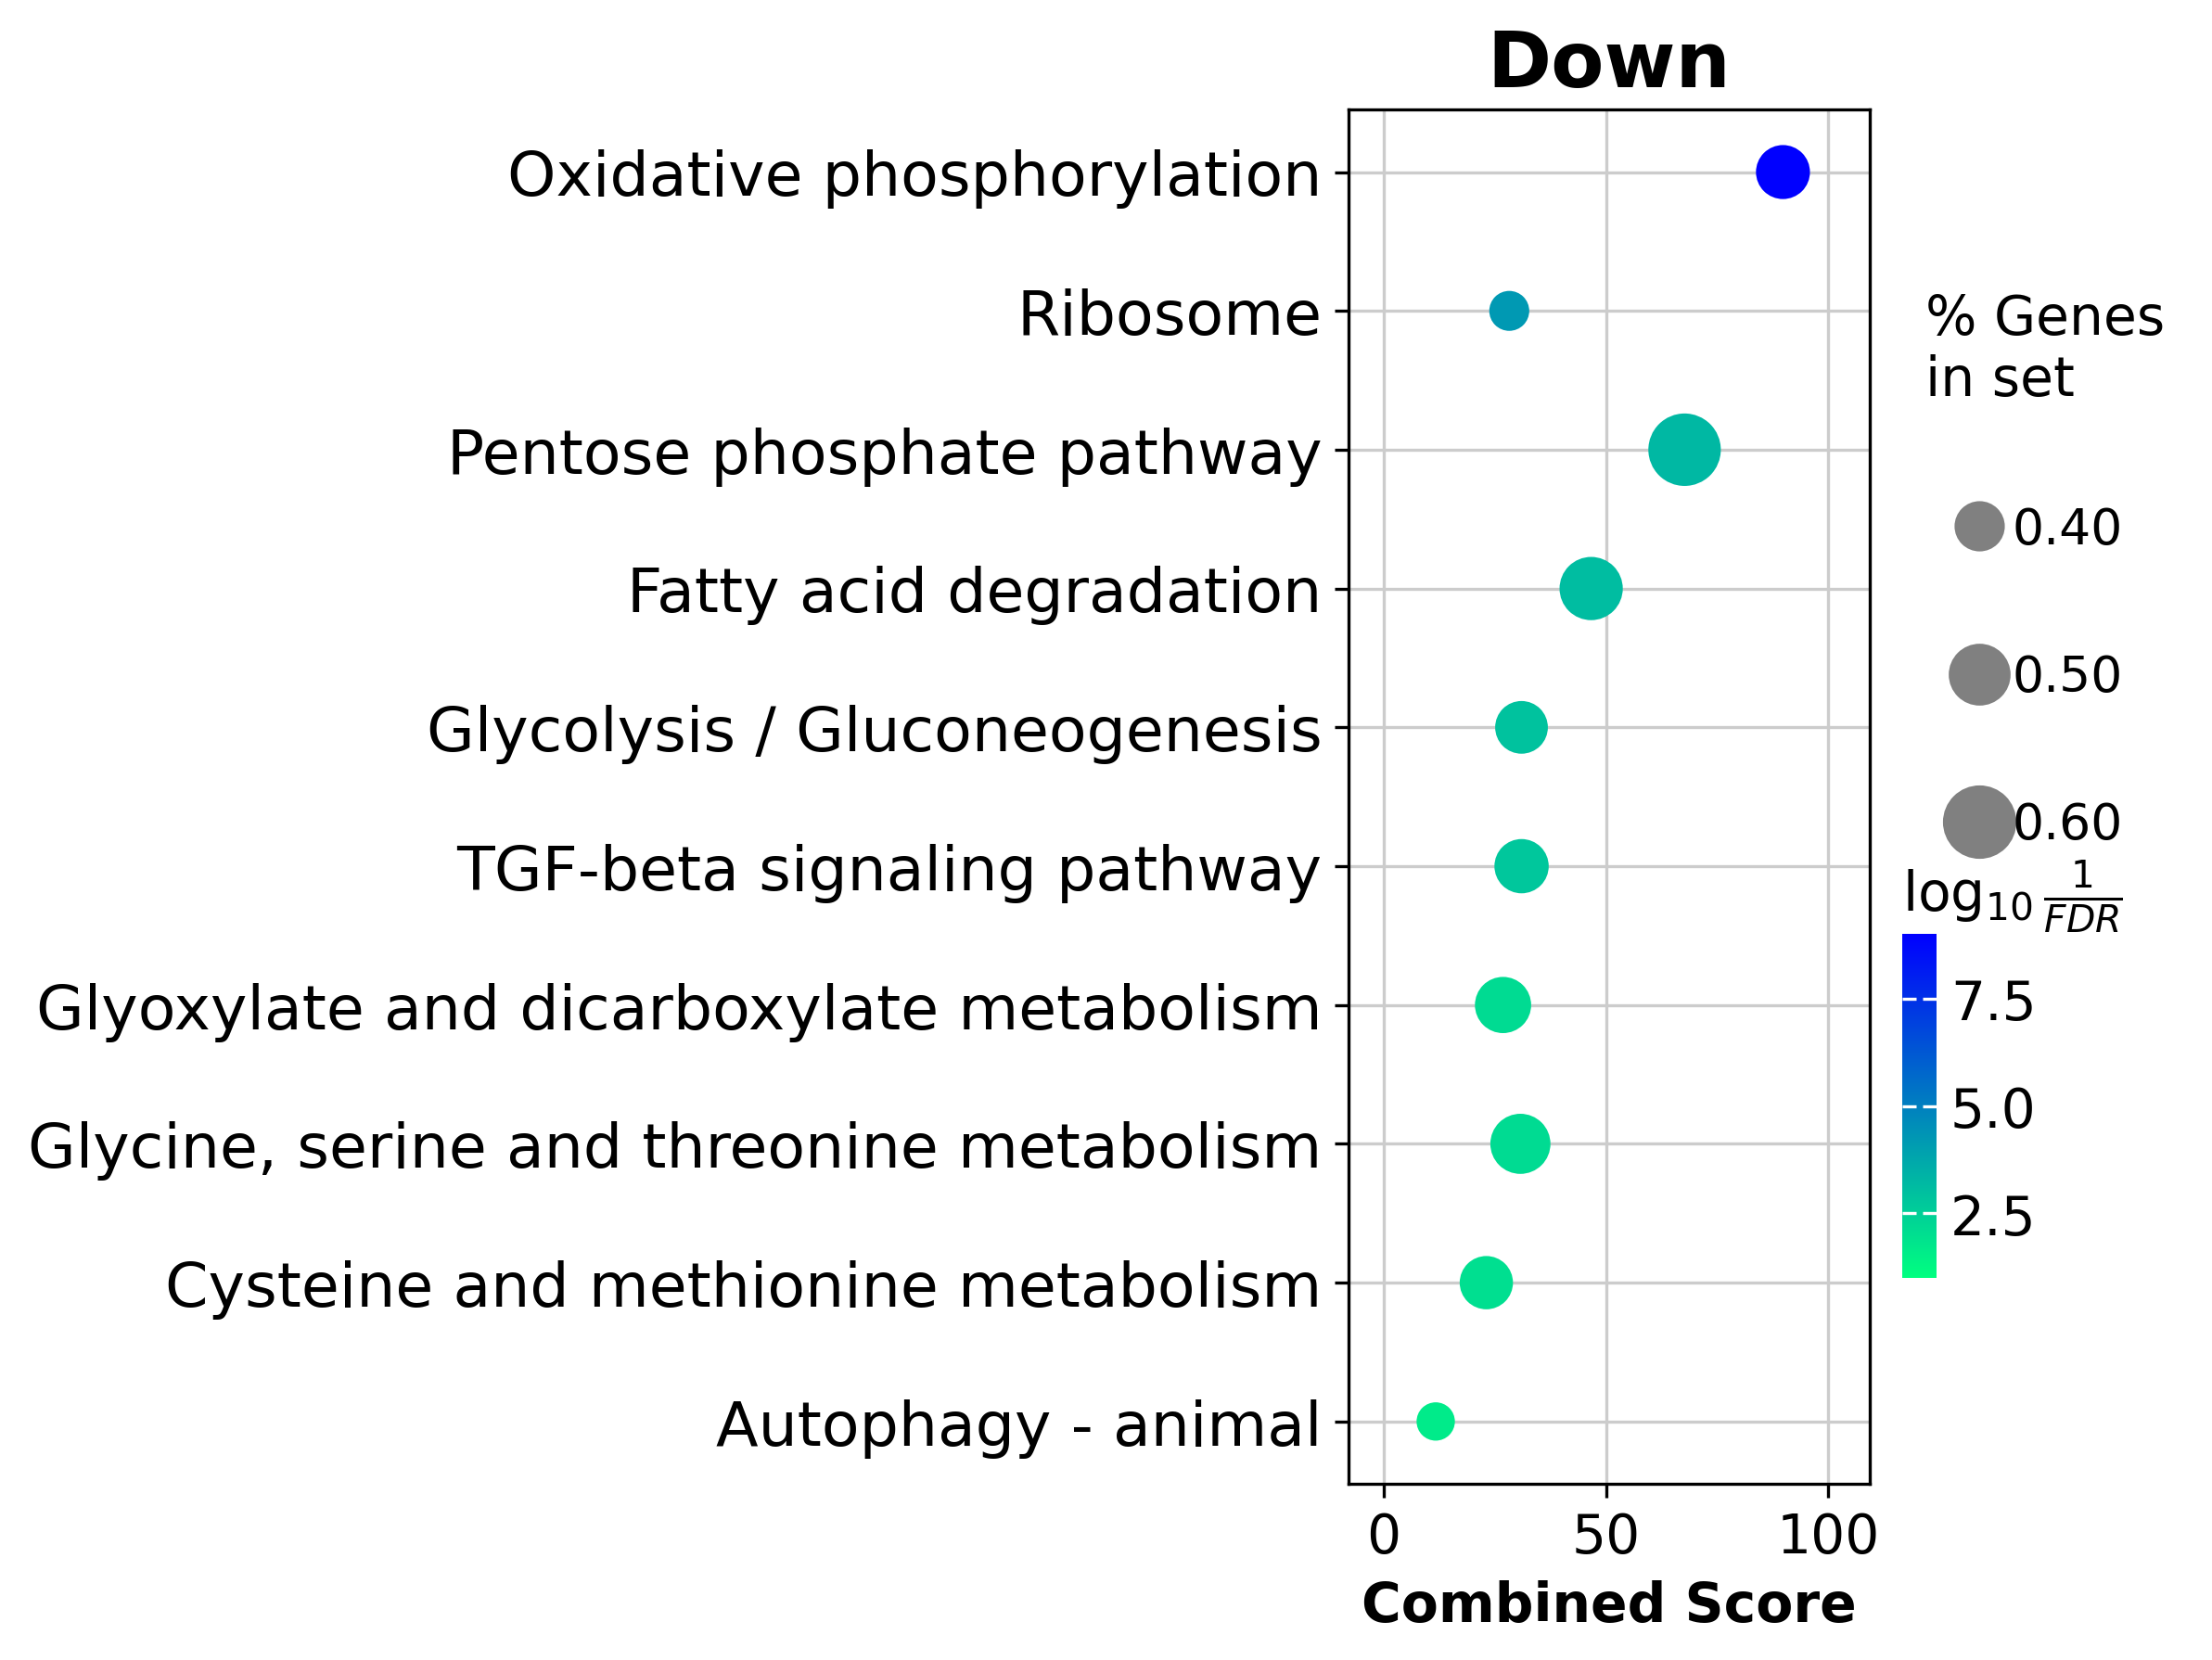

In [39]:
enr_dw.res2d.Term = enr_dw.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_dw.res2d,
           figsize=(3, 6.5),
           title="Down",
           cmap = plt.cm.winter_r,
           size=5, 
           # top_term=20
          )
plt.savefig(f'{figure4PicFolder}/KEGG_pathway_enrichr_fatBody_down.pdf', bbox_inches='tight')
plt.show()

## Plot single-cell data

In [34]:
fattyTerm_L = [term for term in kegg.keys() if 'Fatty acid' in term]
fattyGenes_D = {term: kegg[term] for term in kegg.keys() if 'Fatty acid' in term}

In [53]:
# list(enr_dw.res2d.Term)

['ABC transporters',
 'ATP-dependent chromatin remodeling',
 'Alanine, aspartate and glutamate metabolism',
 'Amino sugar and nucleotide sugar metabolism',
 'Apoptosis - fly',
 'Apoptosis - multiple species',
 'Arachidonic acid metabolism',
 'Arginine and proline metabolism',
 'Arginine biosynthesis',
 'Ascorbate and aldarate metabolism',
 'Autophagy - animal',
 'Autophagy - other',
 'Basal transcription factors',
 'Base excision repair',
 'Biosynthesis of unsaturated fatty acids',
 'Butanoate metabolism',
 'Caffeine metabolism',
 'Circadian rhythm - fly',
 'Citrate cycle (TCA cycle)',
 'Cysteine and methionine metabolism',
 'D-Amino acid metabolism',
 'Dorso-ventral axis formation',
 'Drug metabolism - cytochrome P450',
 'Drug metabolism - other enzymes',
 'ECM-receptor interaction',
 'Efferocytosis',
 'Endocytosis',
 'Ether lipid metabolism',
 'Fatty acid biosynthesis',
 'Fatty acid degradation',
 'Fatty acid elongation',
 'Folate biosynthesis',
 'FoxO signaling pathway',
 'Fructose 

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


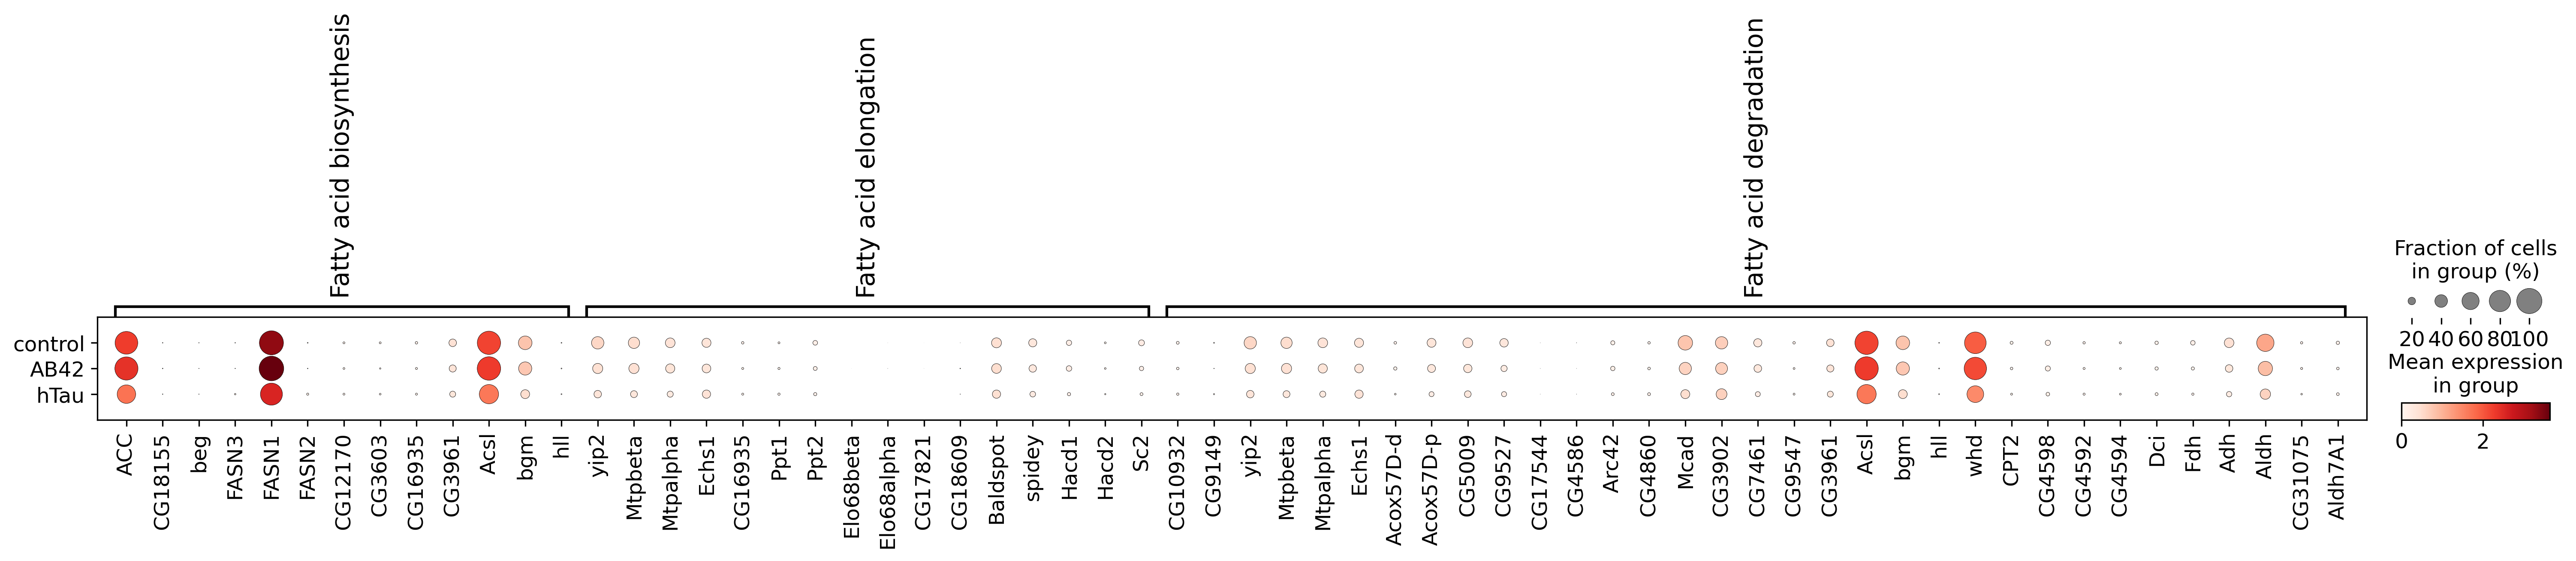

In [35]:
sc.pl.dotplot(adata_body[adata_body.obs.adfca_annotation == 'adult fat body_body'], fattyGenes_D, groupby='genotype', 
              save='_fatBody_KEGG_fattyAcid_genotype.pdf')

In [35]:
fattyTerm_L

['Fatty acid biosynthesis', 'Fatty acid elongation', 'Fatty acid degradation']

In [37]:
fattyDegGenes_D = {term: fattyGenes_D[term] for term in fattyGenes_D if term == 'Fatty acid degradation'}
fattyDegGenes_D

{'Fatty acid degradation': ['CG10932',
  'CG9149',
  'yip2',
  'Mtpbeta',
  'Mtpalpha',
  'Echs1',
  'Acox57D-d',
  'Acox57D-p',
  'CG5009',
  'CG9527',
  'CG17544',
  'CG4586',
  'Arc42',
  'CG4860',
  'Mcad',
  'CG3902',
  'CG7461',
  'CG9547',
  'CG3961',
  'Acsl',
  'bgm',
  'hll',
  'whd',
  'CPT2',
  'CG4598',
  'CG4592',
  'CG4594',
  'Dci',
  'Fdh',
  'Adh',
  'Aldh',
  'CG31075',
  'Aldh7A1']}

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


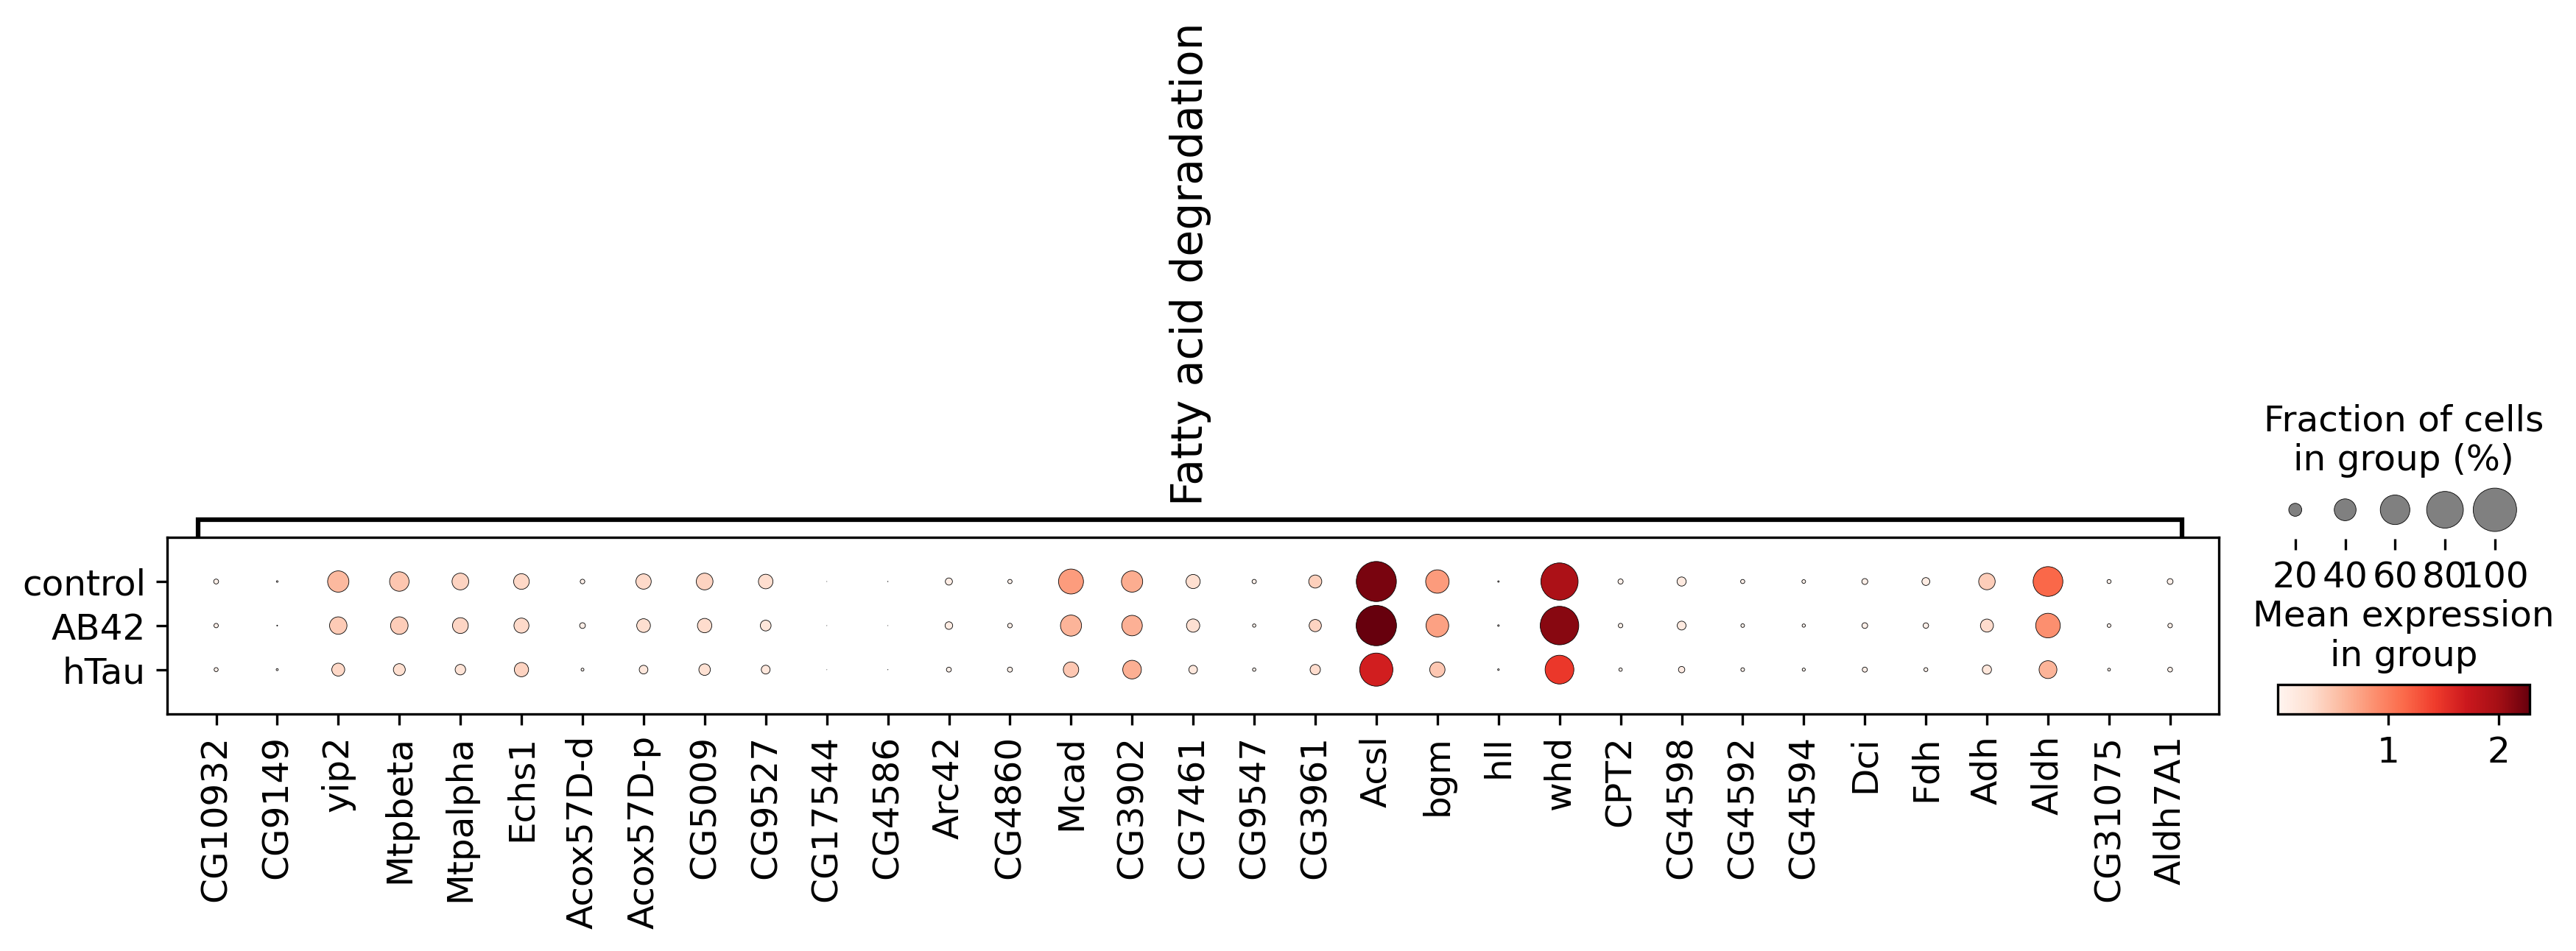

In [38]:
sc.pl.dotplot(adata_body[adata_body.obs.adfca_annotation == 'adult fat body_body'], fattyDegGenes_D, groupby='genotype', 
              save='_fatBody_KEGG_fattyAcidDegradation_genotype.pdf')

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


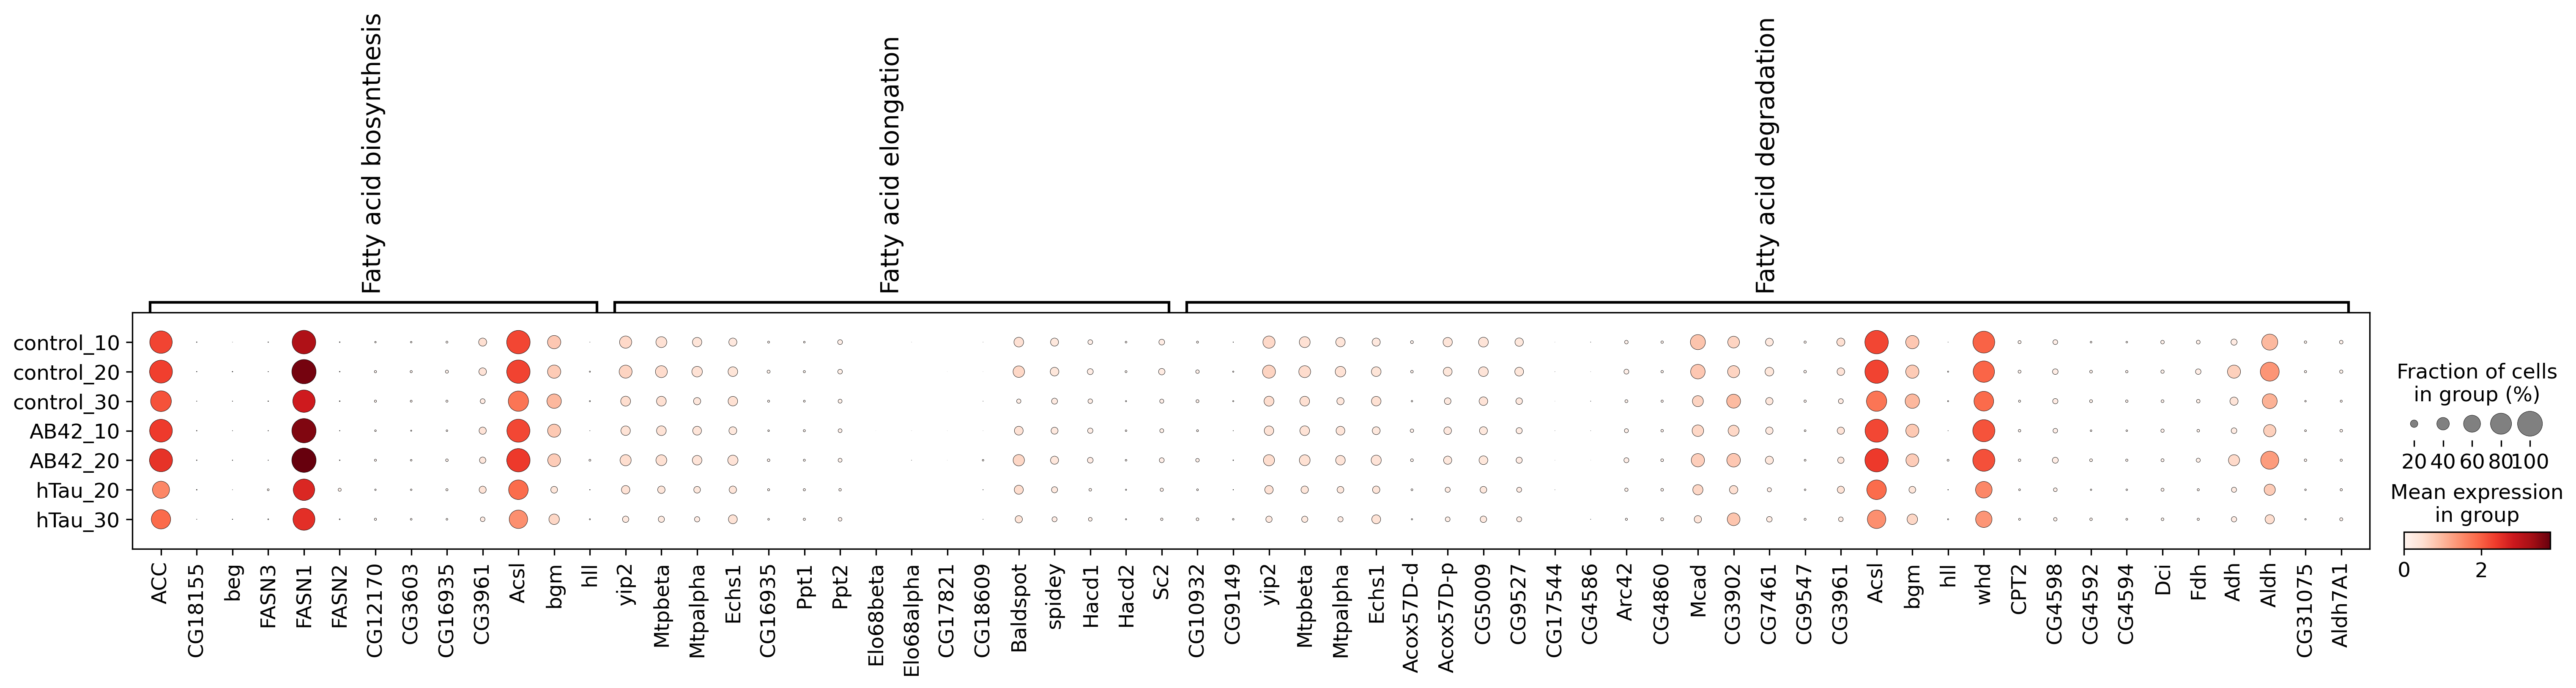

In [39]:
sc.pl.dotplot(adata_body[adata_body.obs.adfca_annotation == 'adult fat body_body'], fattyGenes_D, groupby='genoAge', 
              save='_fatBody_KEGG_fattyAcid_genoAge.pdf')

In [40]:
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure4PicFolder}/{x}')

# Fig4 Sup: GO analysis

## Load files

In [84]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_head_v0.6_woHarmony_raw.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_body_v0.6_woHarmony_raw.h5ad')

In [127]:
adata_headBody = adata_head.concatenate(adata_body, join='outer')
adata_headBody

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 624458 × 16219
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_genes', 'dataset', 'cellBC', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'genoAge', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad', 'leiden_1.0', 'leiden_1.5', 'leiden_2.0', 'leiden_3.0', 'leiden_4.0', 'leiden_5.0', 'leiden_6.0', 'leiden_7.0', 'leiden_8.0', 'leiden_9.0', 'leiden_10.0', 'adfca_annotation_group', 'adfca_annotation_subcluster'
    var: 'gene_ids', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'
    layers: 'logNormalize_exp', 'umi_counts'

## Load GO files

### Load ontologies and associations

In [128]:
import goatools

In [129]:
goatools.__version__

'1.3.1'

In [130]:
!pwd

/data/tcl/Project/ADFCA


In [131]:
from goatools.obo_parser import GODag
from goatools.anno.gaf_reader import GafReader

obodag = GODag("../../Resource/GO/go-basic.obo")
ogaf = GafReader("../../Resource/GO/FlyBase_gene_association_09082022.gaf") # FlyBase file

../../Resource/GO/go-basic.obo: fmt(1.2) rel(2022-07-01) 47,008 Terms
HMS:0:00:02.279826 121,359 annotations READ: ../../Resource/GO/FlyBase_gene_association_09082022.gaf 


In [132]:
ns2assc = ogaf.get_ns2assc()

### Load Background gene set

In [133]:
geneid2symbol_Df=pd.read_table('cellrangerSummary/features.tsv', header=None, index_col=0)
geneid2symbol_Df.head()

1                2
0                                            
FBgn0267594          CR45932  Gene Expression
FBgn0259849  Su(Ste):CR42418  Gene Expression
FBgn0085494     Mst77Y-16Psi  Gene Expression
FBgn0085506          CG40635  Gene Expression
FBgn0259870  Su(Ste):CR42439  Gene Expression

In [134]:
geneid2symbol_D= dict(zip(geneid2symbol_Df.index.to_list(), geneid2symbol_Df[1].to_list()))

In [135]:
symbol2geneid_D= dict(zip(geneid2symbol_Df[1].to_list(), geneid2symbol_Df.index.to_list()))

### Initialize a GOEA object 

In [93]:
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS

goeaobj = GOEnrichmentStudyNS(
        geneid2symbol_D, # List of fly protein-coding genes
        ns2assc, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method


Load BP Ontology Enrichment Analysis ...
 59% 10,305 of 17,562 population items found in association

Load CC Ontology Enrichment Analysis ...
 57%  9,955 of 17,562 population items found in association

Load MF Ontology Enrichment Analysis ...
 53%  9,302 of 17,562 population items found in association


## Load gene list

In [98]:
celltypeN700_L = pd.read_csv(f'{cellnFolder}/celltype_cellN_n700.csv').annotation.to_list()
degLong_Df=pd.read_csv(f'{figure3Folder}/degSummary/degLong_Df_genotype_compareToControl_cellN700.csv', index_col=0)
# degN_nonNeuron_mtx=pd.read_csv(f'{degSummaryFolder}/degN_nonNeuron_mtx_compareToControll_cellN700.csv', index_col=0)
# dotplotNonNeuron_Df=pd.read_csv(f'{compositionFolder}/dotplotNonNeuron_Df_normalizeToControl.csv', index_col=0)
# dfAllNonNeuron = pd.read_csv(f'{compositionFolder}/dfAllNonNeuron_normalizeToControl.csv', index_col=0)

In [141]:
celltypeN700_L_body = adata_body.obs.adfca_annotation.cat.categories.to_list()
len(celltypeN700_L_body)

76

## Plot non-redundant GOs

In [84]:
adata_head = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_head_v0.6_woHarmony_raw.h5ad')
adata_body = sc.read('/data/tcl/Project/ADFCA/adataProcess/v0.6/adfca_body_v0.6_woHarmony_raw.h5ad')

In [113]:
adata_headBody = adata_head.concatenate(adata_body, join='outer')
adata_headBody

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 624458 × 3285
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_genes', 'dataset', 'cellBC', 'sex', 'tissue', 'age', 'genotype', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'leiden', 'genoAge', 'genoAgeSex', 'adfca_annotation', 'adfca_annotation_broad'
    var: 'gene_ids-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mean-0', 'std-0', 'gene_ids-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'mean-1', 'std-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'latent_gene_encoding'

### import revioGO data

In [116]:
from matplotlib.colors import LogNorm, Normalize

In [145]:
allGoConcat_Df=pd.read_csv(f'{figure3Folder}/GO_compareToControl/allGoConcat_Df_compareToControl.csv')
upGoConcat_Df=pd.read_csv(f'{figure3Folder}/GO_compareToControl/upGoConcat_Df_compareToControl.csv')
downGoConcat_Df=pd.read_csv(f'{figure3Folder}/GO_compareToControl/downGoConcat_Df_compareToControl.csv')

In [147]:
revigo_Df = pd.read_table(f'{figure3Folder}/revigo_compareToControl/Revigo_BP_Table_ADFCA.tsv')
revigo_Df[:20]

TermID                                               Name     Value  \
0   GO:0000022                         mitotic spindle elongation -2.441666   
1   GO:0051225                                   spindle assembly -1.669960   
2   GO:0000055        ribosomal large subunit export from nucleus -1.359202   
3   GO:0000165                                       MAPK cascade -1.778889   
4   GO:0000226              microtubule cytoskeleton organization -2.055109   
5   GO:0007051                               spindle organization -1.498134   
6   GO:0000278                                 mitotic cell cycle -2.622228   
7   GO:0007059                             chromosome segregation -1.306328   
8   GO:0000380         alternative mRNA splicing, via spliceosome -1.472329   
9   GO:0000381  regulation of alternative mRNA splicing, via s... -4.946922   
10  GO:0031440               regulation of mRNA 3'-end processing -2.233059   
11  GO:0033120                positive regulation of RNA splicing -1.320334   
12  GO:0048024       regulation of mRNA splicing, via spliceosome -1.343930   
13  GO:0048025  negative regulation of mRNA splicing, via spli... -2.186643   
14  GO:0048026  positive regulation of mRNA splicing, via spli... -2.160861   
15  GO:0048255                                 mRNA stabilization -1.439501   
16  GO:0050684                      regulation of mRNA processing -1.461522   
17  GO:0060213  positive regulation of nuclear-transcribed mRN... -1.780920   
18  GO:1900153  positive regulation of nuclear-transcribed mRN... -1.436945   
19  GO:0000463  maturation of LSU-rRNA from tricistronic rRNA ... -1.951798   

     LogSize  Frequency  Uniqueness  Dispensability  Representative  
0   1.146128   0.113300    0.908234        0.528503             NaN  
1   1.806180   0.549067    0.885278        0.744439            22.0  
2   0.845098   0.052292    0.882807        0.688166             NaN  
3   1.544068   0.296322    0.851776        0.535502             NaN  
4   2.544068   3.041659    0.893243        0.647770             NaN  
5   2.103804   1.098135    0.892956        0.762188           226.0  
6   2.594393   3.416420    0.958225        0.035096             NaN  
7   2.274158   1.629772    0.959916        0.716547           278.0  
8   0.698970   0.034861    0.947086        0.346603             NaN  
9   1.944483   0.758236    0.886103        0.325096             NaN  
10  1.146128   0.113300    0.904394        0.797427           381.0  
11  0.954243   0.069723    0.884954        0.759199           381.0  
12  1.977724   0.819244    0.885375        0.960292           381.0  
13  0.602060   0.026146    0.887418        0.725783           381.0  
14  0.778151   0.043577    0.884537        0.755160           381.0  
15  0.698970   0.034861    0.846254        0.856626           381.0  
16  2.025306   0.915112    0.886876        0.885470           381.0  
17  1.041393   0.087154    0.875479        0.710905           381.0  
18  0.477121   0.017431    0.868102        0.725014           381.0  
19  1.204120   0.130730    0.895156        0.642123             NaN

In [148]:
nonRedundantGo_Df=revigo_Df[revigo_Df.Representative.isna()]
nonRedundantGo_Df

TermID                                              Name     Value  \
0     GO:0000022                        mitotic spindle elongation -2.441666   
2     GO:0000055       ribosomal large subunit export from nucleus -1.359202   
3     GO:0000165                                      MAPK cascade -1.778889   
4     GO:0000226             microtubule cytoskeleton organization -2.055109   
6     GO:0000278                                mitotic cell cycle -2.622228   
...          ...                                               ...       ...   
1157  GO:2000648    positive regulation of stem cell proliferation -1.416600   
1158  GO:2000683          regulation of cellular response to X-ray -1.585713   
1159  GO:2000738  positive regulation of stem cell differentiation -2.576015   
1161  GO:2000779          regulation of double-strand break repair -1.402818   
1162  GO:2001023                    regulation of response to drug -1.650542   

       LogSize  Frequency  Uniqueness  Dispensability  Representative  
0     1.146128   0.113300    0.908234        0.528503             NaN  
2     0.845098   0.052292    0.882807        0.688166             NaN  
3     1.544068   0.296322    0.851776        0.535502             NaN  
4     2.544068   3.041659    0.893243        0.647770             NaN  
6     2.594393   3.416420    0.958225        0.035096             NaN  
...        ...        ...         ...             ...             ...  
1157  0.954243   0.069723    0.902045        0.651139             NaN  
1158  0.698970   0.034861    0.911177        0.310999             NaN  
1159  0.778151   0.043577    0.883649        0.522921             NaN  
1161  1.041393   0.087154    0.882887        0.332103             NaN  
1162  0.602060   0.026146    0.919006        0.304915             NaN  

[517 rows x 8 columns]

In [149]:
revigoNonRedundantGo_L=nonRedundantGo_Df.TermID.to_list()
len(revigoNonRedundantGo_L)

517

In [154]:
goConcatRevigo_Df_exp.annotation.value_counts() 

28

In [153]:
plt.ioff()

color_D = {'up':'Reds', 'down': 'Blues', 'all': 'Purples'}
for degDirection in ['up', 'down', 'all']:
    print(f'degDirection: {degDirection}')
    goConcat_Df = pd.read_csv(f'{figure3Folder}/GO_compareToControl/{degDirection}GoConcat_Df_compareToControl.csv')

    ### GO from revigo ==> don't use in the neuron dataset
    goConcatRevigo_Df=goConcat_Df[goConcat_Df['# GO'].isin(revigoNonRedundantGo_L)]
    goConcatRevigo_Df=goConcat_Df[goConcat_Df.NS == 'BP']
    
    
    # GO from specific genotypes
    # for n, expCompare in enumerate(expCompare_Df.compare2[:]):
    for n, expCompare in enumerate(genoCompare_Df.expSet[:]):
        # expCompare1 = expCompare_Df.compare1[n]
        print(expCompare)
        goConcatRevigo_Df_exp = goConcatRevigo_Df[goConcatRevigo_Df.expCompare == expCompare]
        
        # matrix of GO fdr
        goMtx_exp = pd.DataFrame(columns=celltypeN700_L_body, index=goConcatRevigo_Df_exp.name.value_counts().index.to_list())
        for i, cellType in enumerate(celltypeN700_L_body):
            # print(cellType)
            
            ### run through each GO term
            for j, goName in enumerate(goMtx_exp.index):
                df=goConcatRevigo_Df_exp[(goConcatRevigo_Df_exp.name == goName) & (goConcatRevigo_Df_exp.annotation == cellType)]
                if len(df) != 0:
                    fdr= df.iloc[0,6]
                    goMtx_exp.iloc[j, i]=fdr
                else:
                    goMtx_exp.iloc[j, i]=0
        goMtxTopEach_exp=goMtx_exp[:]
    
    
        ###
        ### top 5 GOs from each cell type
        goN=5
        topGO_eachCelltype_L=[]
        topGO_eachCelltype_D={}
        
        # remove GOs not found in all cell types
        goMtxTopEach_exp.loc[:,'sumGoCounts'] = goMtxTopEach_exp.sum(axis=1)
        # print(goMtxTopEach_exp.shape)
        goMtxTopEach_exp= goMtxTopEach_exp.loc[goMtxTopEach_exp['sumGoCounts'] != 0, :]
        goMtxTopEach_exp.drop('sumGoCounts', axis=1, inplace=True)
        # print(goMtxTopEach_exp.shape)
        
        # select top5 GO from each celltype
        for cellType in goMtxTopEach_exp.columns:
            # print(cellType)    
            
            ### top n GO
            cellType_mtx=pd.DataFrame(goMtxTopEach_exp.loc[:,cellType])
            cellType_mtx.sort_values(by=cellType, ascending=False, inplace=True)
            cellTypeTopGo_L=cellType_mtx.index.to_list()[:goN]
            # print(cellType, cellTypeTopGo_L)
            
            # print(cellTypeTopGo_L)
            if len(cellTypeTopGo_L) != 0:
                for i, go in enumerate(cellTypeTopGo_L):
                    if goMtxTopEach_exp.loc[go, cellType] != 0:
                        topGO_eachCelltype_L.append(go)
                        # print(cellType, go)
                        
                    #     if cellType in topGO_eachCelltype_D.keys(): topGO_eachCelltype_D[cellType].append(go)
                    #     if cellType not in topGO_eachCelltype_D.keys():
                    #         topGO_eachCelltype_D[cellType] = [go]
                    #     if go not in topGO_eachCelltype_L: 
                    #         topGO_eachCelltype_L.append(go)                    
        goMtxTopEach_exp=goMtxTopEach_exp.loc[goMtxTopEach_exp.index.isin(topGO_eachCelltype_L)]
        goMtxTopEach_exp=goMtxTopEach_exp.loc[:, goMtxTopEach_exp.sum(axis=0) != 0]
        goMtxTopEach_exp
        
        # Plot topN GOs
        kws = dict(cbar_kws=dict(orientation='horizontal'))
        ax=sns.clustermap(goMtxTopEach_exp.astype(float),  figsize=(13, 12), xticklabels=True, cmap=color_D[degDirection], dendrogram_ratio=(0.05, 0.1),  **kws, vmax=10, linewidths=0, yticklabels=True)
        ax.ax_cbar.set_position((0.80, .15, .05, .02))
        # ax.cax.set_visible(False)
        plt.savefig(f'{goFolder}/heatmap_GO_{degDirection}_top{goN}Each_{expCompare}.pdf')
        plt.close()
        
        
        # ### Selected cell types
        # goMtxTopEach_exp_select = goMtxTopEach_exp.loc[:,(goMtxTopEach_exp.columns.isin(cellType_L)) ]
        # if sum((goMtxTopEach_exp_select.index.isin(goSelect_L)) | (['endoplasmic reticulum' in index for index in goMtxTopEach_exp_select.index])) > 1:
        #     goMtxTopEach_exp_select = goMtxTopEach_exp_select.loc[ (goMtxTopEach_exp_select.index.isin(goSelect_L)) | (['endoplasmic reticulum' in index for index in goMtxTopEach_exp_select.index]) ]
        #     kws = dict(cbar_kws=dict(orientation='horizontal'))
        #     ax=sns.clustermap(goMtxTopEach_exp_select.astype(float),  figsize=(8.5, 7.5), xticklabels=True, cmap=color_D[degDirection], dendrogram_ratio=(0.05, 0.1),  **kws, vmax=5, linewidths=0, yticklabels=True)
        #     ax.ax_cbar.set_position((0.80, .15, .05, .02))
        #     # ax.cax.set_visible(False)
        #     plt.savefig(f'{goFolder}/heatmap_GO_{degDirection}_top{goN}Each_{expCompare}_selected.pdf')
        #     plt.close()
        
    
    
    print()
plt.ion()

degDirection: up
AB42


/tmp/ipykernel_2227255/515954802.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goMtxTopEach_exp.loc[:,'sumGoCounts'] = goMtxTopEach_exp.sum(axis=1)


hTau


/tmp/ipykernel_2227255/515954802.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goMtxTopEach_exp.loc[:,'sumGoCounts'] = goMtxTopEach_exp.sum(axis=1)



degDirection: down
AB42


/tmp/ipykernel_2227255/515954802.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goMtxTopEach_exp.loc[:,'sumGoCounts'] = goMtxTopEach_exp.sum(axis=1)


hTau


/tmp/ipykernel_2227255/515954802.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goMtxTopEach_exp.loc[:,'sumGoCounts'] = goMtxTopEach_exp.sum(axis=1)



degDirection: all
AB42


/tmp/ipykernel_2227255/515954802.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goMtxTopEach_exp.loc[:,'sumGoCounts'] = goMtxTopEach_exp.sum(axis=1)


hTau


/tmp/ipykernel_2227255/515954802.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goMtxTopEach_exp.loc[:,'sumGoCounts'] = goMtxTopEach_exp.sum(axis=1)


In [154]:
goConcat_Df = pd.read_csv(f'{figure3Folder}/GO_compareToControl/allGoConcat_Df_compareToControl.csv')
goConcat_Df

# GO  NS       p_fdr_bh  \
0     GO:0002181  BP  7.169472e-106   
1     GO:0006412  BP   6.067564e-28   
2     GO:0000028  BP   4.505353e-05   
3     GO:0000027  BP   1.534293e-02   
4     GO:0006414  BP   1.702719e-02   
...          ...  ..            ...   
9346  GO:0030594  MF   1.257236e-03   
9347  GO:0022848  MF   1.257236e-03   
9348  GO:0005231  MF   1.213845e-02   
9349  GO:0050839  MF   1.827185e-02   
9350  GO:1904315  MF   1.827185e-02   

                                                   name  \
0                               cytoplasmic translation   
1                                           translation   
2                      ribosomal small subunit assembly   
3                      ribosomal large subunit assembly   
4                              translational elongation   
...                                                 ...   
9346                 neurotransmitter receptor activity   
9347  acetylcholine-gated cation-selective channel a...   
9348  excitatory extracellular ligand-gated ion chan...   
9349                     cell adhesion molecule binding   
9350  transmitter-gated ion channel activity involve...   

                                             annotation expCompare  \
0     16-cell germline cyst in germarium region 2a a...       hTau   
1     16-cell germline cyst in germarium region 2a a...       hTau   
2     16-cell germline cyst in germarium region 2a a...       hTau   
3     16-cell germline cyst in germarium region 2a a...       hTau   
4     16-cell germline cyst in germarium region 2a a...       hTau   
...                                                 ...        ...   
9346                          transmedullary neuron Tm9       AB42   
9347                          transmedullary neuron Tm9       AB42   
9348                          transmedullary neuron Tm9       AB42   
9349                          transmedullary neuron Tm9       AB42   
9350                          transmedullary neuron Tm9       AB42   

      MinusLogFdr                                             goName  
0      105.144513                 GO:0002181_cytoplasmic translation  
1       27.216986                             GO:0006412_translation  
2        4.346271        GO:0000028_ribosomal small subunit assembly  
3        1.814092        GO:0000027_ribosomal large subunit assembly  
4        1.768857                GO:0006414_translational elongation  
...           ...                                                ...  
9346     2.900583      GO:0030594_neurotransmitter receptor activity  
9347     2.900583  GO:0022848_acetylcholine-gated cation-selectiv...  
9348     1.915837  GO:0005231_excitatory extracellular ligand-gat...  
9349     1.738217          GO:0050839_cell adhesion molecule binding  
9350     1.738217  GO:1904315_transmitter-gated ion channel activ...  

[9351 rows x 8 columns]

In [155]:
adata_headBody.obs.adfca_annotation_broad.value_counts()

CNS neuron                    190758
sensory neuron                 67944
muscle cell                    59410
epithelial cell                49471
female reproductive system     48760
fat cell                       47060
unannotated                    36990
glial cell                     35563
gut cell                       20550
oenocyte                       15605
tracheal cell                  14460
gland                          10162
female germline cell           10151
hemocyte                        9575
male reproductive system        4060
PNS neuron                      2449
excretory system                 918
male germline cell               547
cardial cell                      25
Name: adfca_annotation_broad, dtype: int64

In [161]:
neuronCellType_L = adata_headBody[adata_headBody.obs.adfca_annotation_broad.isin(['CNS neuron', 'sensory neuron', 'PNS neuron'])].obs.adfca_annotation.value_counts().index.to_list()
neuronCellType_L[:10]

['uncharacterized CNS neuron',
 'outer photoreceptor cell',
 'cone cell',
 'adult ventral nervous system',
 'T neuron T4/T5',
 'olfactory receptor neuron',
 'ABeta42-specific cluster',
 'gamma Kenyon cell',
 'alpha/beta Kenyon cell',
 'columnar neuron T1']

In [162]:
goConcat_Df_tau = goConcat_Df[ (goConcat_Df.expCompare == 'hTau') & (goConcat_Df.annotation.isin(neuronCellType_L))]
goConcat_Df_tau

# GO  NS  p_fdr_bh                                  name  \
102   GO:0007268  BP  0.047785        chemical synaptic transmission   
2158  GO:0006302  BP  0.006563            double-strand break repair   
2159  GO:0007268  BP  0.006563        chemical synaptic transmission   
2160  GO:1901215  BP  0.007277   negative regulation of neuron death   
2161  GO:0001508  BP  0.020589                      action potential   
...          ...  ..       ...                                   ...   
9060  GO:0005515  MF  0.005340                       protein binding   
9061  GO:0002046  MF  0.023035                         opsin binding   
9062  GO:0010461  MF  0.023035  light-activated ion channel activity   
9304  GO:0007165  BP  0.003350                   signal transduction   
9305  GO:0051015  MF  0.000626                actin filament binding   

                           annotation expCompare  MinusLogFdr  \
102                    T neuron T4/T5       hTau     1.320708   
2158  adult peripheral nervous system       hTau     2.182867   
2159  adult peripheral nervous system       hTau     2.182867   
2160  adult peripheral nervous system       hTau     2.138026   
2161  adult peripheral nervous system       hTau     1.686371   
...                               ...        ...          ...   
9060            photoreceptor cell R8       hTau     2.272419   
9061            photoreceptor cell R8       hTau     1.637617   
9062            photoreceptor cell R8       hTau     1.637617   
9304        transmedullary neuron Tm1       hTau     2.475018   
9305        transmedullary neuron Tm1       hTau     3.203357   

                                               goName  
102         GO:0007268_chemical synaptic transmission  
2158            GO:0006302_double-strand break repair  
2159        GO:0007268_chemical synaptic transmission  
2160   GO:1901215_negative regulation of neuron death  
2161                      GO:0001508_action potential  
...                                               ...  
9060                       GO:0005515_protein binding  
9061                         GO:0002046_opsin binding  
9062  GO:0010461_light-activated ion channel activity  
9304                   GO:0007165_signal transduction  
9305                GO:0051015_actin filament binding  

[732 rows x 8 columns]

In [170]:
goConcat_Df_tau.goName.value_counts().head(30)

GO:0005886_plasma membrane                                                    13
GO:0007268_chemical synaptic transmission                                      9
GO:0048786_presynaptic active zone                                             9
GO:0045202_synapse                                                             8
GO:0005887_integral component of plasma membrane                               8
GO:0045211_postsynaptic membrane                                               7
GO:0005737_cytoplasm                                                           6
GO:0043005_neuron projection                                                   6
GO:0031594_neuromuscular junction                                              6
GO:0016079_synaptic vesicle exocytosis                                         6
GO:0098609_cell-cell adhesion                                                  5
GO:0030424_axon                                                                5
GO:0005634_nucleus          

In [168]:
goConcat_Df_tau.sort_values(by='MinusLogFdr', ascending=False)[:20]

# GO  NS      p_fdr_bh  \
8594  GO:0005886  CC  5.738806e-25   
8595  GO:0005737  CC  3.275780e-20   
8596  GO:0005634  CC  1.383285e-16   
8597  GO:0016028  CC  3.166539e-16   
8661  GO:0005515  MF  4.071310e-16   
8598  GO:0031594  CC  9.449653e-16   
2721  GO:0005886  CC  7.303742e-15   
3427  GO:0005737  CC  9.467702e-15   
3428  GO:0005886  CC  1.521841e-12   
8662  GO:0004674  MF  2.824476e-12   
9048  GO:0016028  CC  1.229721e-11   
8378  GO:0016059  BP  1.423275e-11   
3429  GO:0005634  CC  5.507620e-11   
7694  GO:0005886  CC  6.916570e-10   
8379  GO:0042052  BP  6.984742e-10   
8380  GO:0006468  BP  6.984742e-10   
3451  GO:0005515  MF  2.169440e-09   
8663  GO:0005524  MF  2.186232e-09   
2651  GO:1902600  BP  3.144440e-09   
8381  GO:0007602  BP  4.459828e-09   

                                              name  \
8594                               plasma membrane   
8595                                     cytoplasm   
8596                                       nucleus   
8597                                    rhabdomere   
8661                               protein binding   
8598                        neuromuscular junction   
2721                               plasma membrane   
3427                                     cytoplasm   
3428                               plasma membrane   
8662      protein serine/threonine kinase activity   
9048                                    rhabdomere   
8378  deactivation of rhodopsin mediated signaling   
3429                                       nucleus   
7694                               plasma membrane   
8379                        rhabdomere development   
8380                       protein phosphorylation   
3451                               protein binding   
8663                                   ATP binding   
2651                proton transmembrane transport   
8381                             phototransduction   

                        annotation expCompare  MinusLogFdr  \
8594      outer photoreceptor cell       hTau    24.241178   
8595      outer photoreceptor cell       hTau    19.484685   
8596      outer photoreceptor cell       hTau    15.859088   
8597      outer photoreceptor cell       hTau    15.499415   
8661      outer photoreceptor cell       hTau    15.390266   
8598      outer photoreceptor cell       hTau    15.024584   
2721  adult ventral nervous system       hTau    14.136455   
3427                     cone cell       hTau    14.023755   
3428                     cone cell       hTau    11.817631   
8662      outer photoreceptor cell       hTau    11.549062   
9048         photoreceptor cell R8       hTau    10.910194   
8378      outer photoreceptor cell       hTau    10.846711   
3429                     cone cell       hTau    10.259036   
7694    lamina monopolar neuron L2       hTau     9.160109   
8379      outer photoreceptor cell       hTau     9.155850   
8380      outer photoreceptor cell       hTau     9.155850   
3451                     cone cell       hTau     8.663652   
8663      outer photoreceptor cell       hTau     8.660304   
2651  adult ventral nervous system       hTau     8.502457   
8381      outer photoreceptor cell       hTau     8.350682   

                                                 goName  
8594                         GO:0005886_plasma membrane  
8595                               GO:0005737_cytoplasm  
8596                                 GO:0005634_nucleus  
8597                              GO:0016028_rhabdomere  
8661                         GO:0005515_protein binding  
8598                  GO:0031594_neuromuscular junction  
2721                         GO:0005886_plasma membrane  
3427                               GO:0005737_cytoplasm  
3428                         GO:0005886_plasma membrane  
8662  GO:0004674_protein serine/threonine kinase act...  
9048                              GO:0016028_rhabdomere  
8378  GO:0016059_deactivation of rhodopsin mediated ...  
3429                 

## Expression of nSyb in EE

In [72]:
neuronCellType_L = adata_headBody[adata_headBody.obs.adfca_annotation_broad.isin(['CNS neuron', 'sensory neuron', 'PNS neuron'])].obs.adfca_annotation.value_counts().index.to_list()
neuronCellType_L.remove('cone cell')
neuronCellType_L[:10]

['uncharacterized CNS neuron',
 'outer photoreceptor cell',
 'adult ventral nervous system',
 'T neuron T4/T5',
 'olfactory receptor neuron',
 'ABeta42-specific cluster',
 'gamma Kenyon cell',
 'alpha/beta Kenyon cell',
 'columnar neuron T1',
 'photoreceptor cell R8']

/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/data/tcl/miniconda3/envs/scanpy182/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.ob

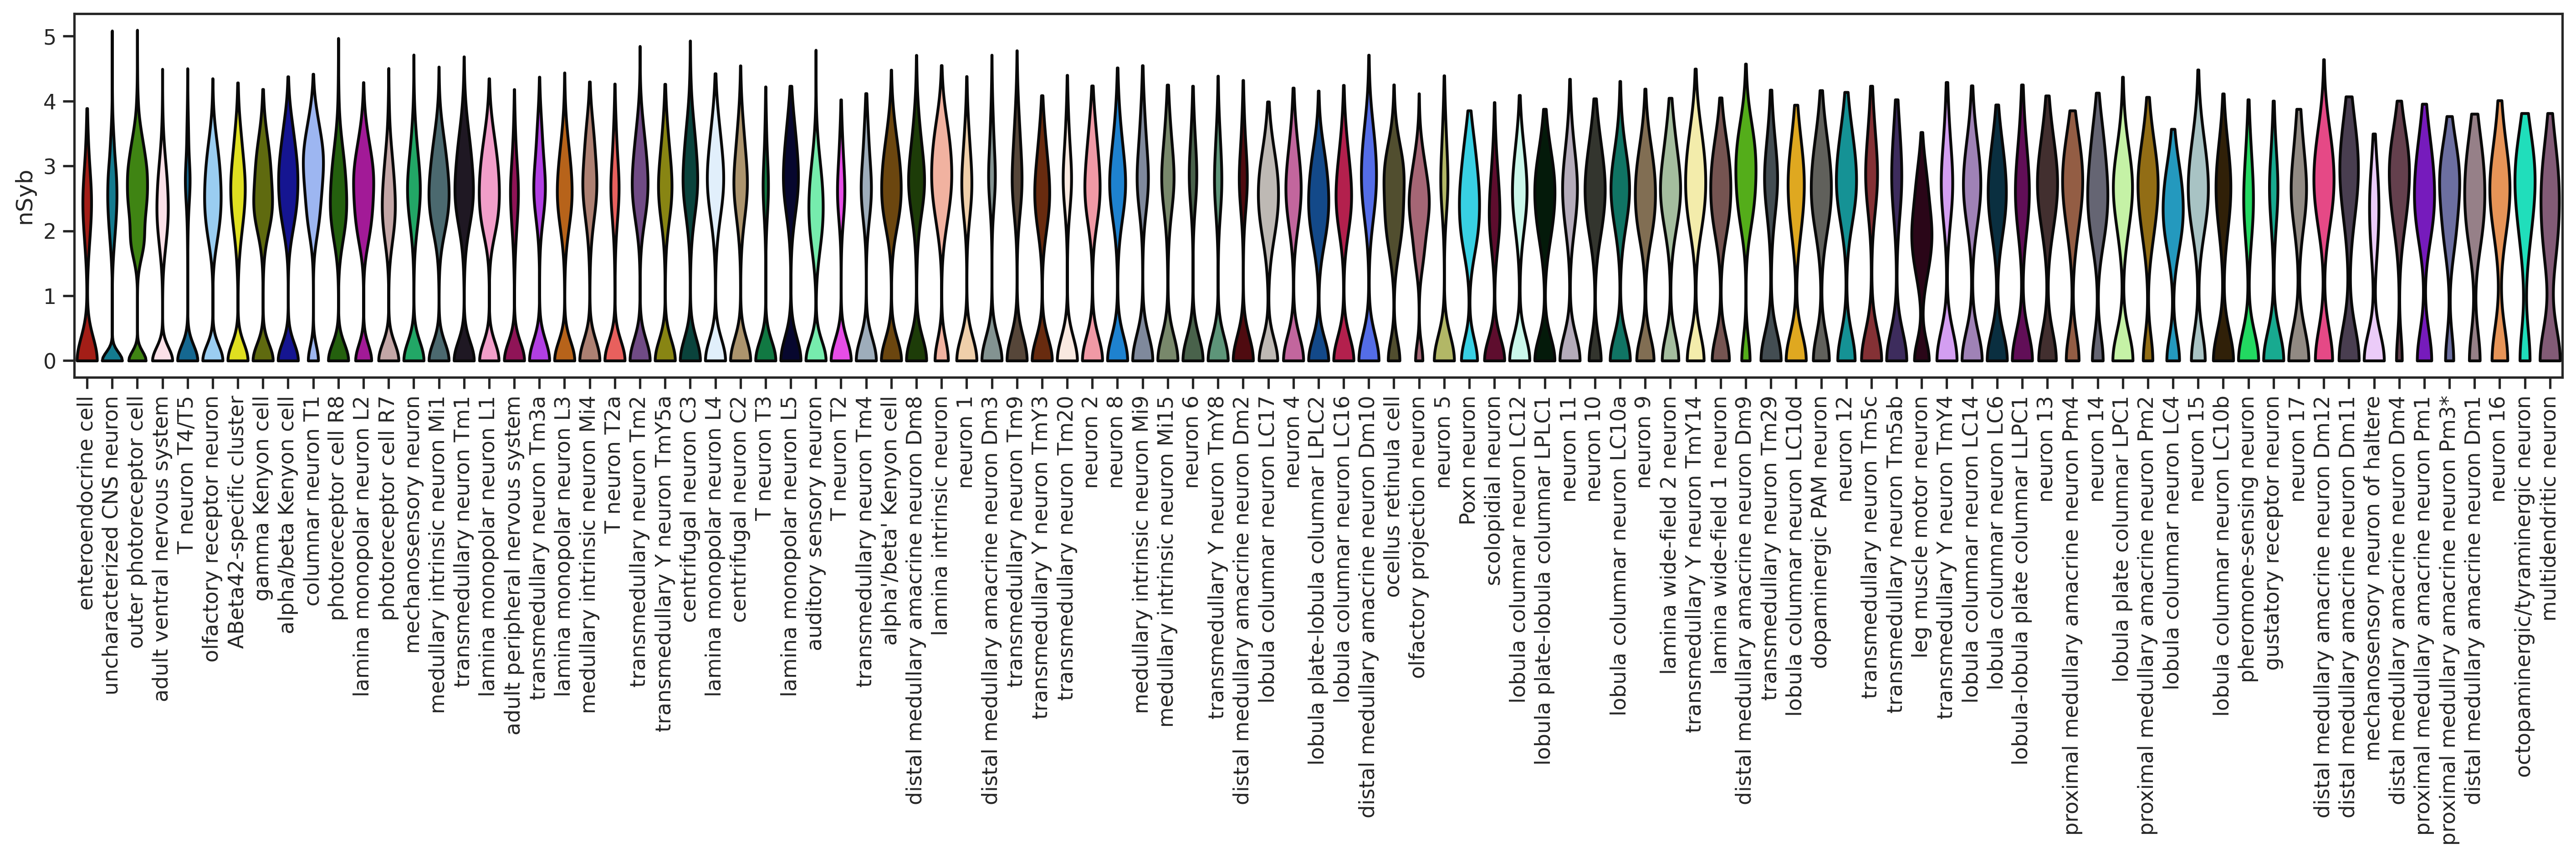

In [87]:
with rc_context({'figure.figsize': (18, 3.5)}):
    sc.pl.violin(adata_headBody[ (adata_headBody.obs.adfca_annotation.isin(neuronCellType_L + ['enteroendocrine cell']))  ], 
                 keys=['nSyb'], groupby='adfca_annotation', size = 0, rotation=90, 
                 order= ['enteroendocrine cell'] + neuronCellType_L, 
                 save=f'_nSyb__eeCell_neuron.pdf')

In [88]:
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{figure4PicFolder}/{x}')

# Finish